In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#crimes_ny = pd.read_csv('data_criminality_ny.csv')
#crimes_spb = pd.read_csv('data_criminality_spb.csv')
#gov_spb = pd.read_csv('gov_spb.csv')
gov_ny = pd.read_csv('gov_ny.csv')

In [14]:
def score_matrix(df, r=1):
    one_km = 0.008913
    km = one_km * r
    all_scores = []
    for lat in np.arange(df['Latitude'].min(), df['Latitude'].max(), 2 * km):
        for long in np.arange(df['Longitude'].min(), df['Longitude'].max(), 2 * km):
            tmp = len(df[(df.Latitude < lat + km) & (df.Latitude > lat - km) &
                                          (df.Longitude < long + km) & (df.Longitude > long - km)])
            if tmp != 0:
                all_scores.append(tmp)
    
    return all_scores

In [15]:
def score(df, lat, long, all_mean, all_std,  r=1):
    one_km = 0.008913
    km = one_km * r
    
    result = (np.log(len(df[(df.Latitude < lat + km) & (df.Latitude > lat - km) &
        (df.Longitude < long + km) & (df.Longitude > long - km)]) + 1) - all_mean) / all_std
    
    return result

(array([ 86.,  68.,  61.,  60.,  74.,  25.,  13.,   3.,   1.,   1.]),
 array([-1.31855003, -0.8225007 , -0.32645136,  0.16959797,  0.6656473 ,
         1.16169663,  1.65774596,  2.15379529,  2.64984463,  3.14589396,
         3.64194329]),
 <a list of 10 Patch objects>)

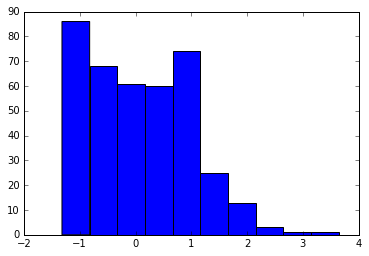

In [19]:
all_scores = score_matrix(crimes_spb)
plt.hist((np.log(all_scores) - np.log(all_scores).mean()) / np.log(all_scores).std())

In [17]:
lat = 59.963786
long = 30.298661
score(crimes_spb, lat, long, np.log(all_scores).mean(), np.log(all_scores).std())

-0.28992267745119488

In [18]:
houses_df = pd.read_csv('data/OpenData/Технико-экономические паспорта многоквартирных домов.csv')
houses_df = houses_df[(houses_df.lng < 31.1) & (houses_df.lng > 29.6)]
houses_df = houses_df[(houses_df.lat < 60.12) & (houses_df.lat > 59.7)]
houses_df = houses_df.dropna()
houses_df.head()

,﻿Улица,Дом,Район,Количество проживающих,Год постройки,"Серия, тип проекта",Общая площадь здания,Число этажей,Число лестниц,lng,lat
0,Лени Голикова ул.,23,Кировский,213.0,1967,Г-3И,3601.449951,5.0,7.0,30.229946,59.844715
1,Среднегаванский пр.,14,Василеостровский,69.0,1901,Индивидуальный,1581.380005,6.0,2.0,30.243179,59.930236
2,Рашетова ул.,9,Выборгский,82.0,1965,Индивидуальный,2334.000000,9.0,1.0,30.324209,60.020927
3,Сердобольская ул.,37,Приморский,60.0,1916,Индивидуальный,1978.150024,5.0,1.0,30.316559,59.989446
4,Флотская ул.,2,Кронштадский,344.0,1900,Индивидуальный,8968.500000,3.0,4.0,30.473965,60.059112


In [21]:
out_df = pd.DataFrame()
out_df['lng'] = houses_df['lng']
out_df['lat'] = houses_df['lat']

all_scores = score_matrix(crimes_spb)
for i in out_df.index:
    out_df.loc[i, 'criminality_score'] = score(crimes_spb, out_df.loc[i, 'lat'], out_df.loc[i, 'lng'], np.log(all_scores).mean(), np.log(all_scores).std())
out_df.head()

,lng,lat,criminality_score
0,30.229946,59.844715,0.679315
1,30.243179,59.930236,0.910500
2,30.324209,60.020927,0.910500
3,30.316559,59.989446,0.910500
4,30.473965,60.059112,-1.318550


In [24]:
#all_scores = score_matrix(gov_spb)
for i in out_df.index:
    out_df.loc[i, 'complaints_score'] = score(gov_spb, out_df.loc[i, 'lat'], out_df.loc[i, 'lng'], np.log(all_scores).mean(), np.log(all_scores).std())
out_df.head()

,lng,lat,criminality_score,complaints_score
0,30.229946,59.844715,0.679315,1.117699
1,30.243179,59.930236,0.910500,1.172718
2,30.324209,60.020927,0.910500,1.223731
3,30.316559,59.989446,0.910500,1.240615
4,30.473965,60.059112,-1.318550,-1.798249


In [25]:
out_df.to_csv('olya_features.csv')